In [ ]:
#https://www.indgold.com/coimbatore-gold-rate-september-2024.htm

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/Files for Colab/Coimbatore Gold Rate/gold_rate_data_aug2021_oct2024.csv")
print(data)

data['Day'] = data['Date'].str.split('-').str[0].astype(int)

# Insert the 'day' column after 'evening' and before 'month'
data.insert(data.columns.get_loc("Month"), 'Day', data.pop('Day'))


df = data.copy()
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as the index for easier plotting
data.set_index('Date', inplace=True)
print(data)
print(df)

import pandas as pd
data['Evening_Differenced_1'] = [None] * len(data)
for i in range(1, len(data)):
    data.iloc[i,-1] = data.iloc[i,1] - data.iloc[i-1,1]
print(data)

train_data = data.iloc[:1096,:]
test_data = data.iloc[1096:,:]
print(train_data)
print(test_data)

train_df = df.iloc[:1096,:]
test_df = df.iloc[1096:,:]

Mounted at /content/drive
           Date  Morning  Evening    Month  Year
0      1-Aug-21     4500     4500   August  2021
1      2-Aug-21     4500     4500   August  2021
2      3-Aug-21     4490     4490   August  2021
3      4-Aug-21     4490     4490   August  2021
4      5-Aug-21     4480     4480   August  2021
...         ...      ...      ...      ...   ...
1178  22-Oct-24     7300     7300  October  2024
1179  23-Oct-24     7340     7340  October  2024
1180  24-Oct-24     7285     7285  October  2024
1181  25-Oct-24     7295     7295  October  2024
1182  26-Oct-24     7360     7360  October  2024

[1183 rows x 5 columns]


<ipython-input-1-f2855a0ab6ba>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


            Morning  Evening  Day    Month  Year
Date                                            
2021-08-01     4500     4500    1   August  2021
2021-08-02     4500     4500    2   August  2021
2021-08-03     4490     4490    3   August  2021
2021-08-04     4490     4490    4   August  2021
2021-08-05     4480     4480    5   August  2021
...             ...      ...  ...      ...   ...
2024-10-22     7300     7300   22  October  2024
2024-10-23     7340     7340   23  October  2024
2024-10-24     7285     7285   24  October  2024
2024-10-25     7295     7295   25  October  2024
2024-10-26     7360     7360   26  October  2024

[1183 rows x 5 columns]
           Date  Morning  Evening  Day    Month  Year
0      1-Aug-21     4500     4500    1   August  2021
1      2-Aug-21     4500     4500    2   August  2021
2      3-Aug-21     4490     4490    3   August  2021
3      4-Aug-21     4490     4490    4   August  2021
4      5-Aug-21     4480     4480    5   August  2021
...         ..

In [ ]:
!pip install requests-html

In [ ]:
import asyncio
from requests_html import AsyncHTMLSession
from bs4 import BeautifulSoup
import pandas as pd

# Create an asynchronous session
asession = AsyncHTMLSession()

# Function to fetch data for a specific month and year
async def fetch_monthly_data(month, year):
    url = f'https://www.indgold.com/coimbatore-gold-rate-{month}-{year}.htm'
    response = await asession.get(url)
    await response.html.arender(timeout=20)

    # Parse the content with BeautifulSoup
    soup = BeautifulSoup(response.html.html, 'html.parser')

    # Find all <table> elements
    tables = soup.find_all('table')

    # Check if there are at least two tables
    if len(tables) >= 2:
        target_table = tables[1]

        # Extract table rows
        rows = target_table.find_all('tr')

        # Create lists to store data
        data = []

        # Loop through rows, skipping the header if present
        for row in rows[1:]:
            cols = row.find_all('td')
            data.append([col.get_text(strip=True) for col in cols])

        # Convert to DataFrame
        month_df = pd.DataFrame(data, columns=['Date', 'Morning', 'Evening'])
        month_df['Month'] = month.capitalize()  # Add month for reference
        month_df['Year'] = year                # Add year for reference
        return month_df
    else:
        print(f"No data found for {month}-{year}")
        return pd.DataFrame(columns=['Date', 'Morning', 'Evening', 'Month', 'Year'])

# Main function to loop over months and years
async def fetch_all_data():
    # Define the date range
    start_year, end_year = 2021, 2023
    months = ['january', 'february', 'march', 'april', 'may', 'june', 'july','august', 'september', 'october', 'november', 'december']

    all_data = pd.DataFrame()  # Initialize an empty DataFrame

    # Loop through each year and month
    for year in range(start_year, end_year + 1):
        for month in months:
            # Skip months beyond July 2023
            if year == 2023 and month == 'august':
                break

            # Fetch data for the month
            month_data = await fetch_monthly_data(month, year)

            # Append to the main DataFrame
            all_data = pd.concat([all_data, month_data], ignore_index=True)

    # Export the final DataFrame to CSV
    all_data.to_csv('gold_rate_data_aug2021_jul2023.csv', index=False)
    print("Data has been saved to gold_rate_data_aug2021_jul2023.csv")

# Run the async function
await fetch_all_data()


No data found for january-2021
No data found for february-2021
No data found for march-2021
No data found for april-2021
No data found for may-2021
No data found for june-2021
No data found for july-2021
Data has been saved to gold_rate_data_aug2021_jul2023.csv


In [ ]:
import asyncio
from requests_html import AsyncHTMLSession
from bs4 import BeautifulSoup
import pandas as pd

# Create an asynchronous session
asession = AsyncHTMLSession()

# Function to fetch data for a specific month and year
async def fetch_monthly_data(month, year):
    url = f'https://www.indgold.com/coimbatore-gold-rate-{month}-{year}.htm'
    response = await asession.get(url)
    await response.html.arender(timeout=20)  # Render JavaScript content

    # Parse the content with BeautifulSoup
    soup = BeautifulSoup(response.html.html, 'html.parser')

    # Extract the <div id="table">
    table_div = soup.find('div', id='table')
    if table_div:
        # Extract table rows
        rows = table_div.find_all('tr')

        # Create lists to store data
        data = []

        # Loop through rows, skipping the header
        for row in rows[1:]:
            cols = row.find_all('td')
            data.append([col.get_text(strip=True) for col in cols])

        # Convert to DataFrame
        month_df = pd.DataFrame(data, columns=['Date', 'Morning', 'Evening'])
        month_df['Month'] = month.capitalize()  # Add month for reference
        month_df['Year'] = year                # Add year for reference
        return month_df
    else:
        print(f"No data found for {month}-{year}")
        return pd.DataFrame(columns=['Date', 'Morning', 'Evening', 'Month', 'Year'])

# Main function to loop over months and years
async def fetch_all_data():
    # Define the date range from August 2023 to October 2024
    months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
    years = [2023, 2024]

    # Track the month and year combination for the range
    all_data = pd.DataFrame()  # Initialize an empty DataFrame

    for year in years:
        for month in months:
            # Skip months before August 2023 and after October 2024
            if year == 2023 and month not in months[months.index("august"):]:
                continue
            elif year == 2024 and month not in months[:months.index("october") ]:
                break

            # Fetch data for the month
            month_data = await fetch_monthly_data(month, year)

            # Append to the main DataFrame
            all_data = pd.concat([all_data, month_data], ignore_index=True)

    # Load the existing CSV and append new data
    existing_data = pd.read_csv('gold_rate_data_aug2021_jul2023.csv')
    combined_data = pd.concat([existing_data, all_data], ignore_index=True)

    # Export the combined data to a new CSV file
    combined_data.to_csv('gold_rate_data_aug2021_sept2024.csv', index=False)
    print("Data has been saved to gold_rate_data_aug2021_sept2024.csv")

# Run the async function
await fetch_all_data()


Data has been saved to gold_rate_data_aug2021_sept2024.csv


In [ ]:
import asyncio
from requests_html import AsyncHTMLSession
from bs4 import BeautifulSoup
import pandas as pd

# Create an asynchronous session
asession = AsyncHTMLSession()

# The function to fetch data from the most recent page (assumed to contain October 2024 data)
async def fetch_page():
    url = 'https://www.indgold.com/coimbatore-gold-rate.htm'
    response = await asession.get(url)
    await response.html.arender(timeout=20)  # Render JavaScript content

    # Parse the content with BeautifulSoup
    soup = BeautifulSoup(response.html.html, 'html.parser')

    # Extract the <div id="table">
    table_div = soup.find('div', id='table')
    if table_div:
        # Extract table rows
        rows = table_div.find_all('tr')

        # Create lists to store data
        data = []

        # Loop through rows, skipping the header
        for row in rows[1:]:
            cols = row.find_all('td')
            row_data = [col.get_text(strip=True) for col in cols]
            row_data.extend(['October', 2024])  # Add month and year
            data.append(row_data)

        # Convert to DataFrame with additional Month and Year columns
        df = pd.DataFrame(data, columns=['Date', 'Morning', 'Evening', 'Month', 'Year'])

        return df
    else:
        print("No <div> found with id='table'.")
        return pd.DataFrame()  # Return empty DataFrame if no data found

# Main function to fetch data and update the CSV
async def update_csv():
    # Fetch the October 2024 data
    october_2024_data = await fetch_page()

    # Check if the data was fetched successfully
    if not october_2024_data.empty:
        # Load the existing CSV file with data up to September 2024
        existing_data = pd.read_csv('gold_rate_data_aug2021_sept2024.csv')

        # Append the new data
        updated_data = pd.concat([existing_data, october_2024_data], ignore_index=True)

        # Save the updated data to a new CSV file
        updated_data.to_csv('gold_rate_data_aug2021_oct2024.csv', index=False)
        print("Data has been updated and saved to gold_rate_data_aug2021_oct2024.csv")
    else:
        print("Failed to fetch October 2024 data.")

# Run the async function
await update_csv()


Data has been updated and saved to gold_rate_data_aug2021_oct2024.csv


In [ ]:
import pandas as pd
data = pd.read_csv("gold_rate_data_aug2021_oct2024.csv")
print(data)

data['Day'] = data['Date'].str.split('-').str[0].astype(int)

# Insert the 'day' column after 'evening' and before 'month'
data.insert(data.columns.get_loc("Month"), 'Day', data.pop('Day'))


df = data.copy()
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as the index for easier plotting
data.set_index('Date', inplace=True)
print(data)
print(df)


FileNotFoundError: [Errno 2] No such file or directory: 'gold_rate_data_aug2021_oct2024.csv'

In [ ]:
train_data = data.iloc[:1096,:]
test_data = data.iloc[1096:,:]
print(train_data)
print(test_data)

            Morning  Evening  Day   Month  Year
Date                                           
2021-08-01     4500     4500    1  August  2021
2021-08-02     4500     4500    2  August  2021
2021-08-03     4490     4490    3  August  2021
2021-08-04     4490     4490    4  August  2021
2021-08-05     4480     4480    5  August  2021
...             ...      ...  ...     ...   ...
2024-07-27     6325     6325   27    July  2024
2024-07-28     6325     6325   28    July  2024
2024-07-29     6340     6340   29    July  2024
2024-07-30     6320     6320   30    July  2024
2024-07-31     6400     6400   31    July  2024

[1096 rows x 5 columns]
            Morning  Evening  Day    Month  Year
Date                                            
2024-08-01     6450     6450    1   August  2024
2024-08-02     6480     6480    2   August  2024
2024-08-03     6470     6470    3   August  2024
2024-08-04     6470     6470    4   August  2024
2024-08-05     6470     6470    5   August  2024
...     

In [ ]:
duplicates = data.duplicated().sum()
print(duplicates)
data_cleaned = data.drop_duplicates()



0


In [ ]:
Q1 = data_cleaned[['Morning', 'Evening']].quantile(0.25)
Q3 = data_cleaned[['Morning', 'Evening']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data_cleaned[['Morning', 'Evening']] < (Q1 - 1.5 * IQR)) |
            (data_cleaned[['Morning', 'Evening']] > (Q3 + 1.5 * IQR))).sum()


In [ ]:
print("Duplicates Removed:", duplicates)
print("Outliers in each column:", outliers)
print("Sample of Cleaned Data:\n", data_cleaned.head())

Duplicates Removed: 0
Outliers in each column: Morning    0
Evening    0
dtype: int64
Sample of Cleaned Data:
             Morning  Evening  Day   Month  Year Evening_Differenced_1
Date                                                                 
2021-08-01     4500     4500    1  August  2021                  None
2021-08-02     4500     4500    2  August  2021                     0
2021-08-03     4490     4490    3  August  2021                   -10
2021-08-04     4490     4490    4  August  2021                     0
2021-08-05     4480     4480    5  August  2021                   -10


In [ ]:
min_morning = data_cleaned['Morning'].min()
max_morning = data_cleaned['Morning'].max()
min_evening = data_cleaned['Evening'].min()
max_evening = data_cleaned['Evening'].max()

data_cleaned['Morning'] = (data_cleaned['Morning'] - min_morning) / (max_morning - min_morning)
data_cleaned['Evening'] = (data_cleaned['Evening'] - min_evening) / (max_evening - min_evening)

print("Data after Min-Max Normalization:\n", data_cleaned[['Morning', 'Evening']].head())


Data after Min-Max Normalization:
              Morning   Evening
Date                          
2021-08-01  0.063830  0.063830
2021-08-02  0.063830  0.063830
2021-08-03  0.060556  0.060556
2021-08-04  0.060556  0.060556
2021-08-05  0.057283  0.057283


In [ ]:
import matplotlib.pyplot as plt

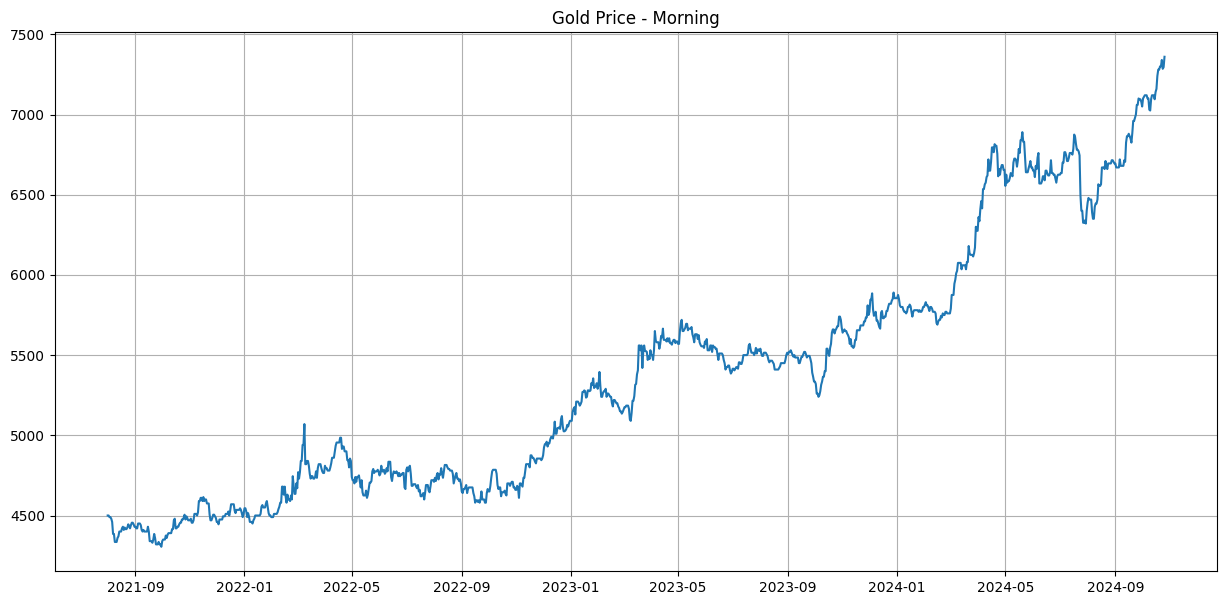

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Morning'])
plt.title('Gold Price - Morning')
plt.grid(True)
plt.show()

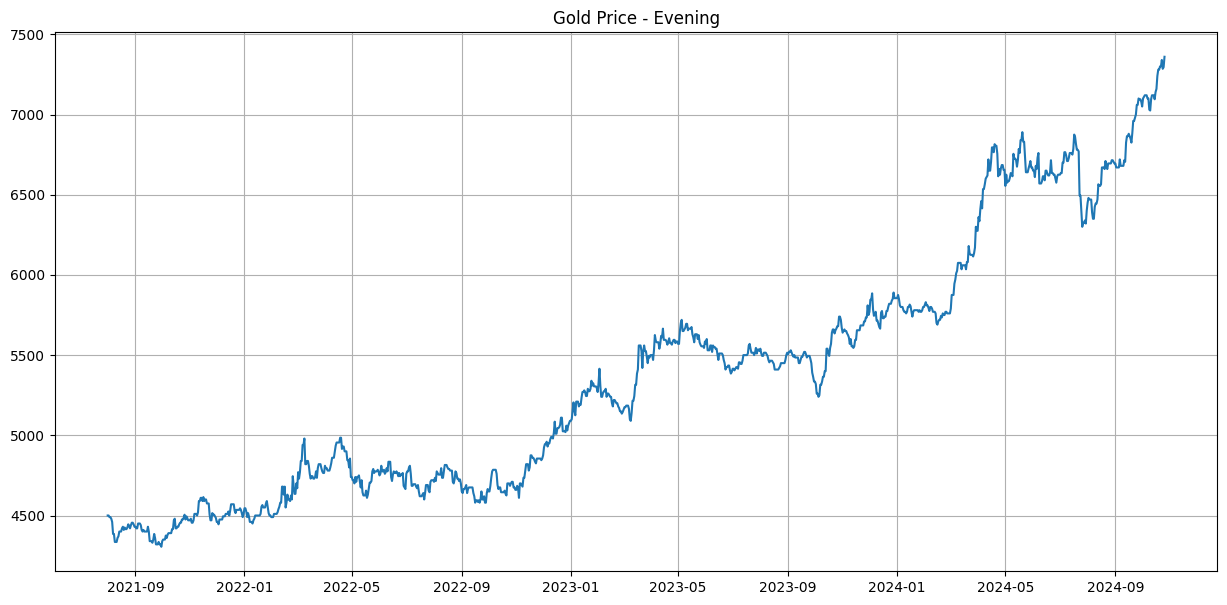

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Evening'])
plt.title('Gold Price - Evening')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Date v/s Gold Price')

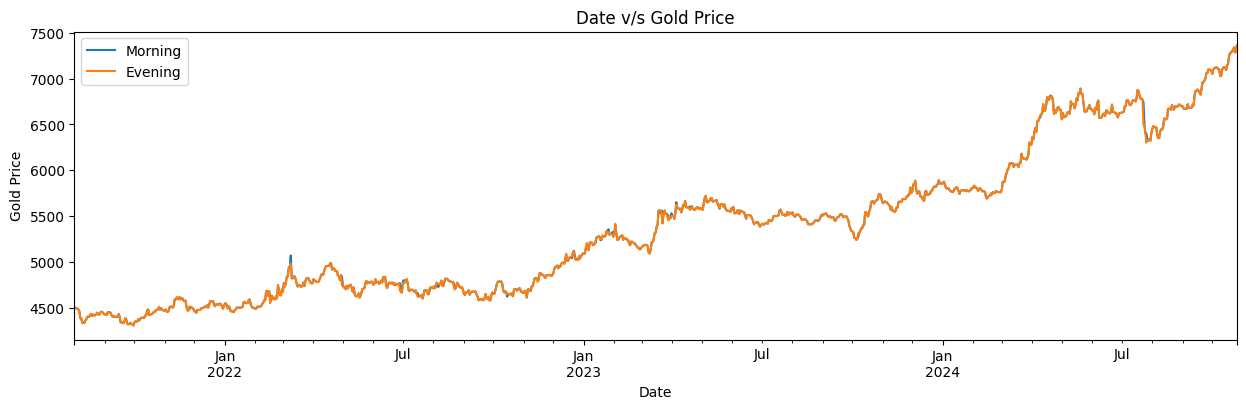

In [ ]:
gold=df.set_index(pd.DatetimeIndex(df['Date'])).drop(columns=["Date","Day","Month","Year"],axis=1)
gold.plot(figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Date v/s Gold Price")
#it's better to set limits to x and y labels to get better results in plots---------this plot is not okay

Text(0.5, 1.0, 'Gold Price for year')

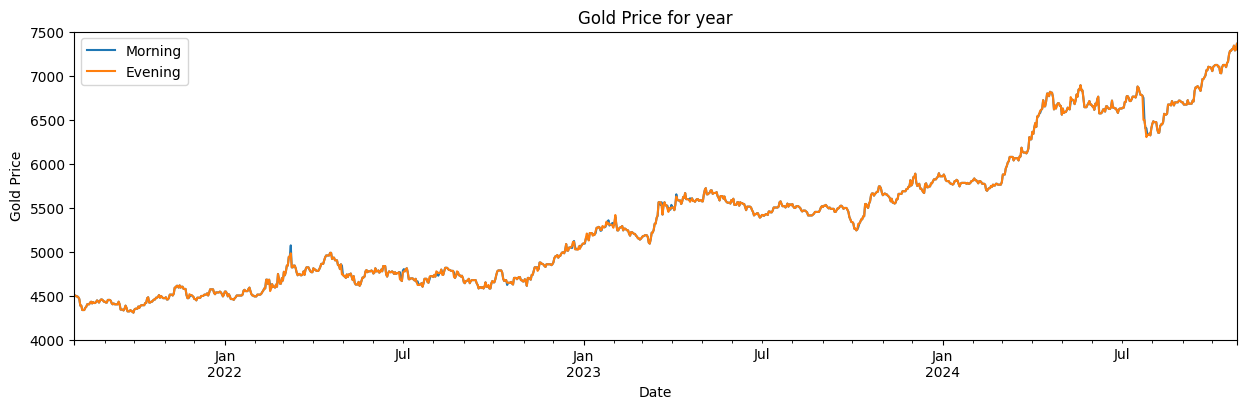

In [ ]:
gold.plot(xlim=['1-Aug-21','26-Oct-24'],ylim=[4000,7500],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for year")
#This plot is better

Text(0.5, 1.0, 'Gold Price for year 2021-22')

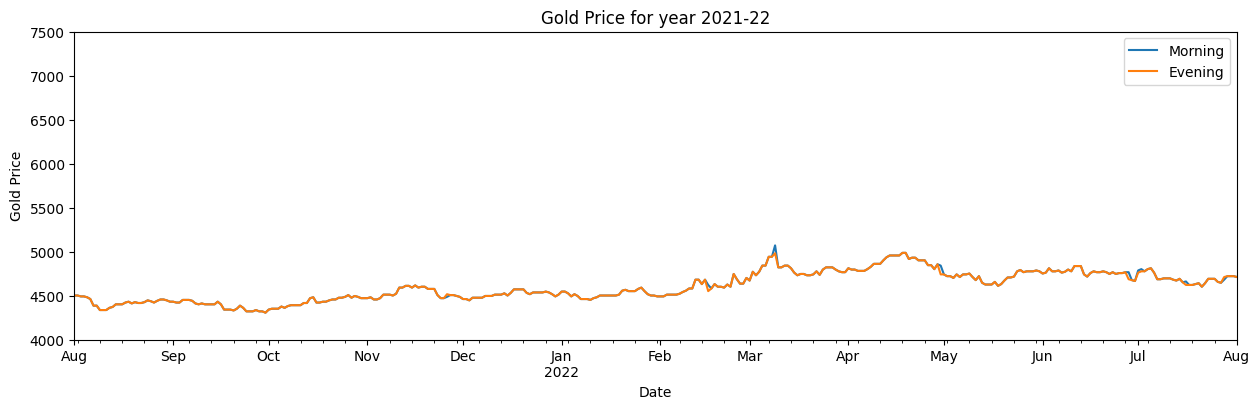

In [ ]:
gold.plot(xlim=['1-Aug-21','1-Aug-22'],ylim=[4000,7500],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for year 2021-22")

Text(0.5, 1.0, 'Gold Price for year 2022-23')

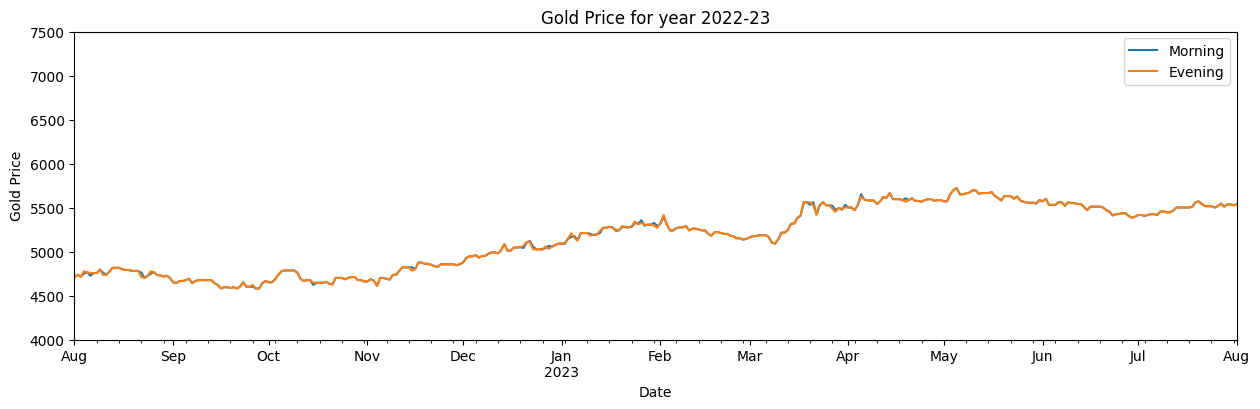

In [ ]:
gold.plot(xlim=['1-Aug-22','1-Aug-23'],ylim=[4000,7500],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for year 2022-23")

Text(0.5, 1.0, 'Gold Price for year 2023-24')

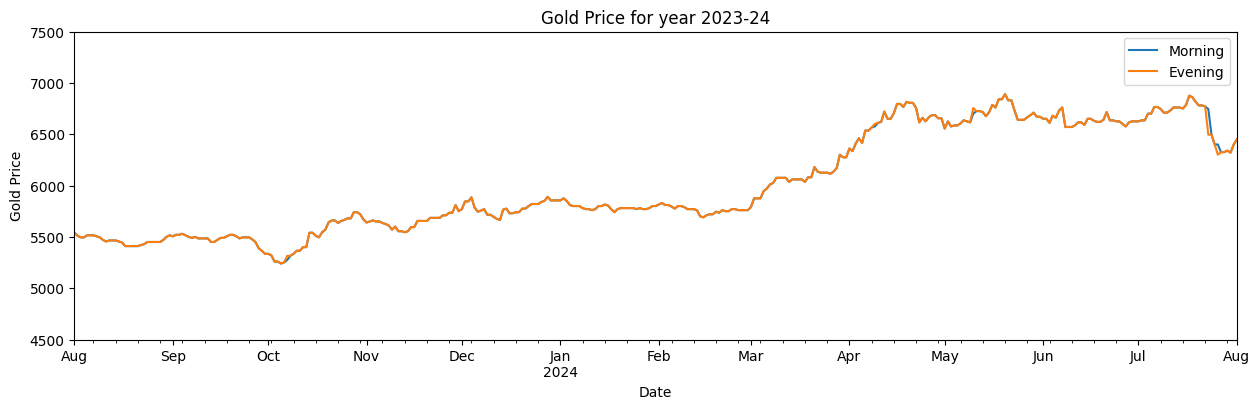

In [ ]:
gold.plot(xlim=['1-Aug-23','1-Aug-24'],ylim=[4500,7500],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for year 2023-24")

Text(0.5, 1.0, 'Gold Price for year 2024')

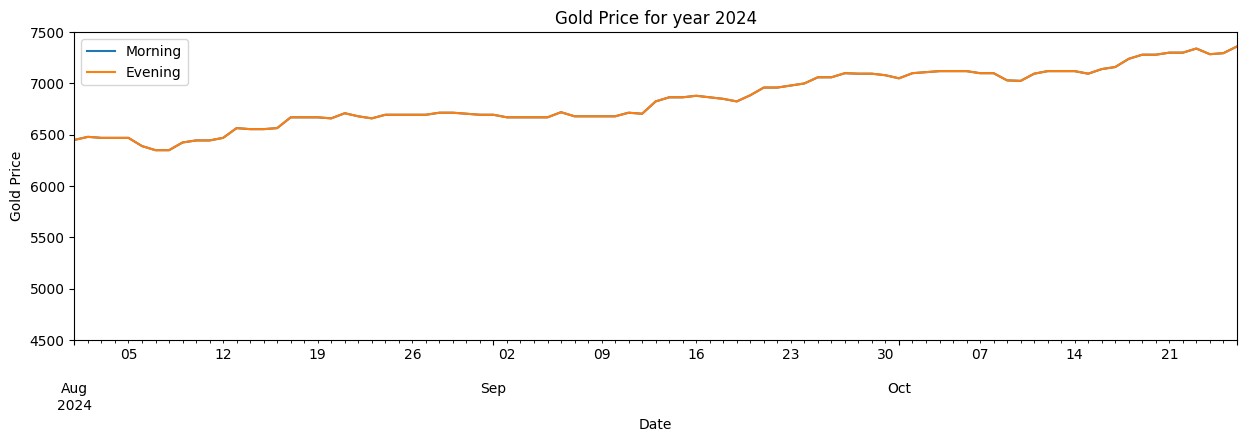

In [ ]:
gold.plot(xlim=['1-Aug-24','26-Oct-24'],ylim=[4500,7500],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for year 2024")

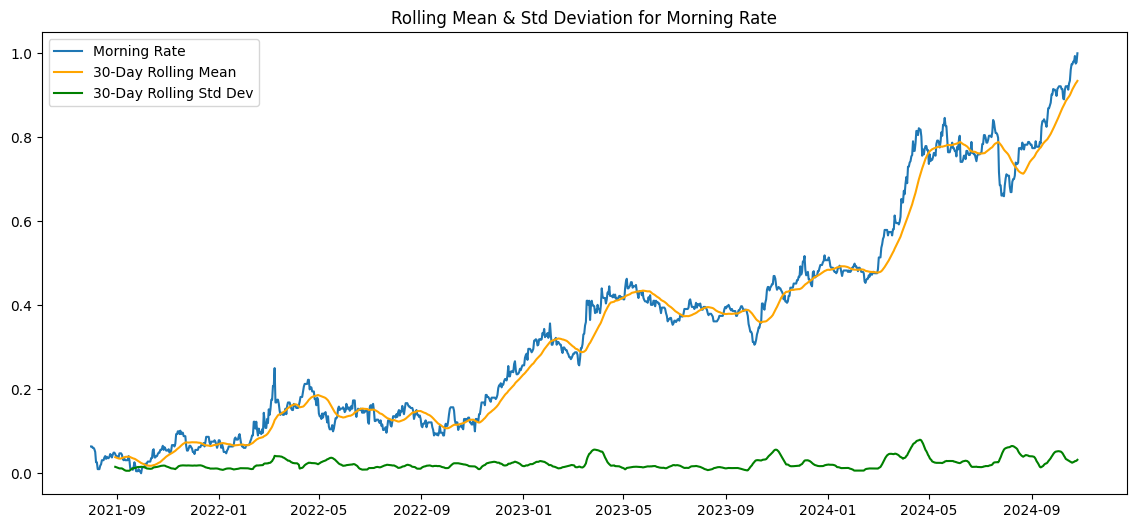

In [ ]:

# 2. Rolling Mean and Standard Deviation
rolling_window = 30  # 30-day rolling window
data_cleaned['Morning_RollingMean'] = data_cleaned['Morning'].rolling(window=rolling_window).mean()
data_cleaned['Morning_RollingStd'] = data_cleaned['Morning'].rolling(window=rolling_window).std()

plt.figure(figsize=(14, 6))
plt.plot(data_cleaned['Morning'], label='Morning Rate')
plt.plot(data_cleaned['Morning_RollingMean'], label='30-Day Rolling Mean', color='orange')
plt.plot(data_cleaned['Morning_RollingStd'], label='30-Day Rolling Std Dev', color='green')
plt.title("Rolling Mean & Std Deviation for Morning Rate")
plt.legend()
plt.show()



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt

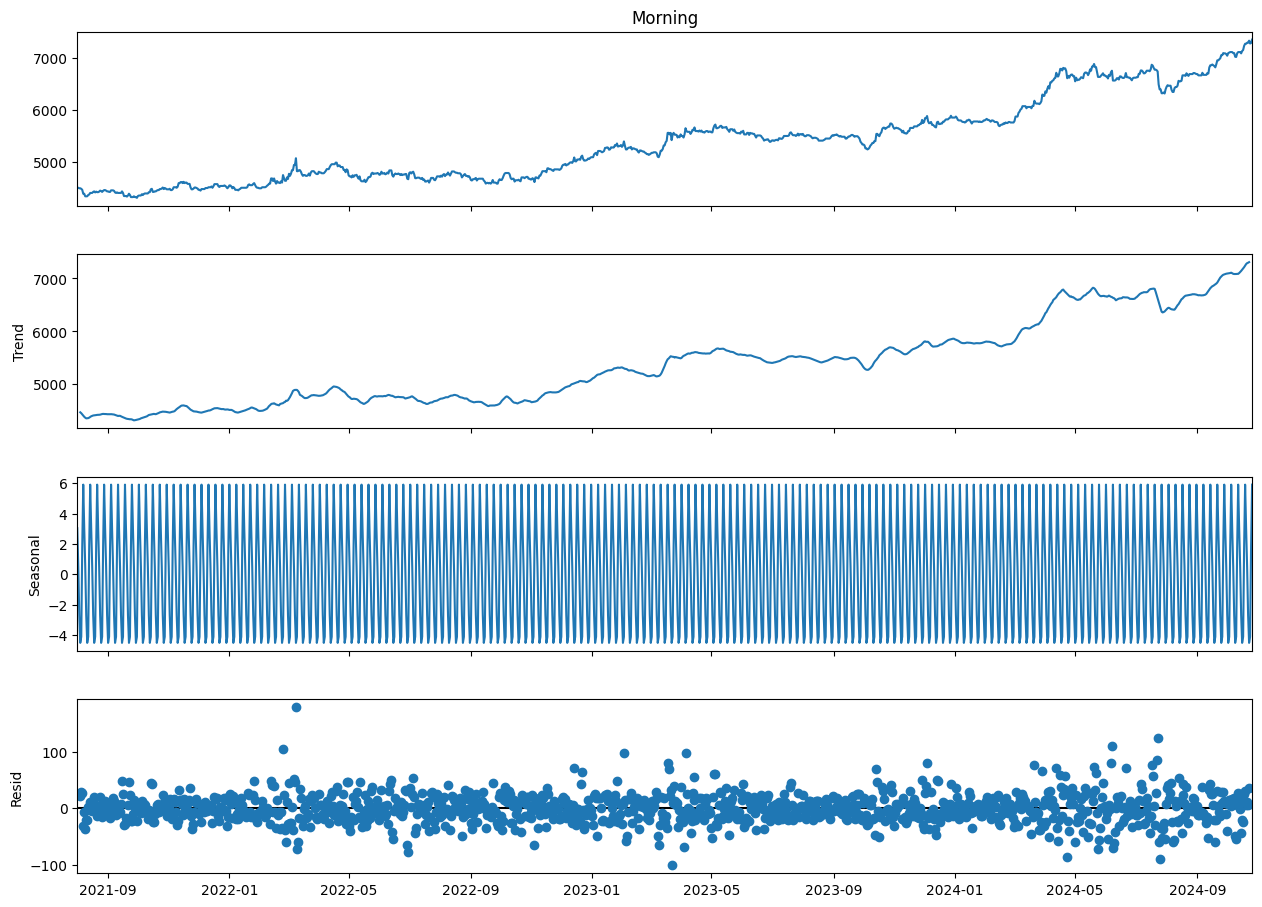

In [ ]:
# 3. Seasonal Decomposition
decomposition = sm.tsa.seasonal_decompose(data['Morning'], model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


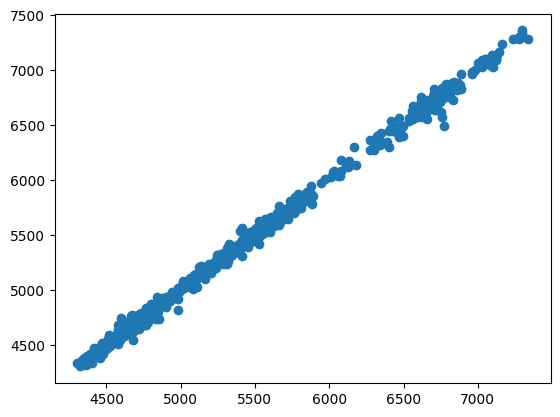

In [ ]:
plt.scatter(data.iloc[:-1,1],data.iloc[1:,1]) #yt versus yt-1

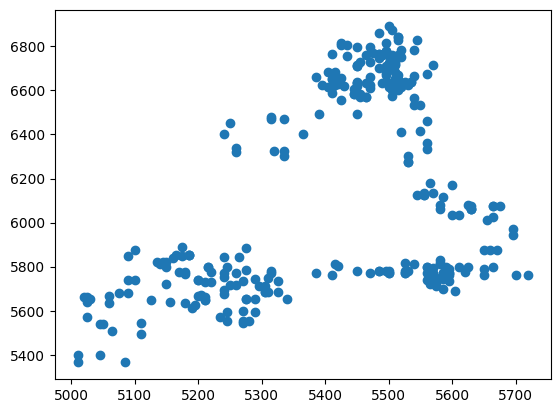

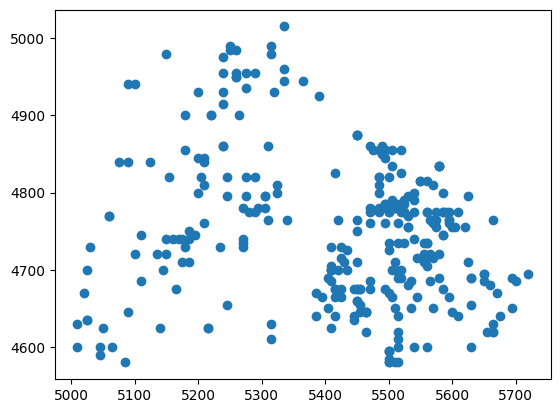

In [ ]:
'''
for a stationary process that the nature of the joint probability distribution
𝑝(𝑧𝑡, 𝑧𝑡+𝑘) of values separated by 𝑘 intervals of time can be inferred by plotting a scatter
diagram using pairs of values(𝑧𝑡, 𝑧𝑡+𝑘) of the time series, separated by a constant interval or
lag k
'''
import matplotlib.pyplot as plt
plt.scatter(data.iloc[500:800,1],data.iloc[500+300:800+300,1])
plt.show()
plt.scatter(data.iloc[500:800,1],data.iloc[500-300:800-300,1])


In [ ]:
print(data.iloc[:-1,1].mean())
print(data.iloc[1:,1].mean())
#yt vs yt-1

5371.535532994923
5373.955160744501


Date
2021-08-12    4421.250000
2021-08-13    4410.416667
2021-08-14    4402.083333
2021-08-15    4394.583333
2021-08-16    4387.083333
                 ...     
2024-10-22    7187.500000
2024-10-23    7207.916667
2024-10-24    7221.666667
2024-10-25    7236.250000
2024-10-26    7256.250000
Name: Evening, Length: 1172, dtype: float64 Date
2021-08-12    71.035363
2021-08-13    67.771620
2021-08-14    61.624166
2021-08-15    55.080863
2021-08-16    46.341535
                ...    
2024-10-22    84.732198
2024-10-23    89.784042
2024-10-24    87.706466
2024-10-25    83.723707
2024-10-26    82.078815
Name: Evening, Length: 1172, dtype: float64


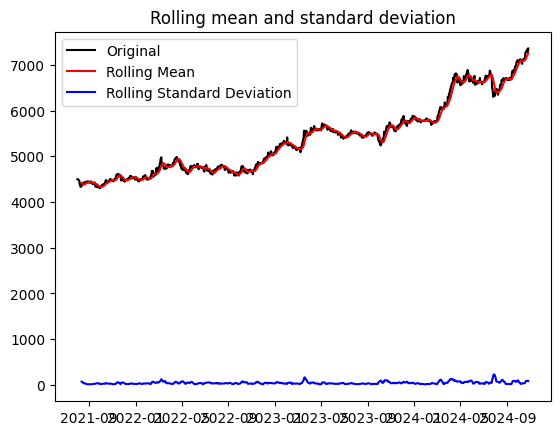

In [ ]:
rmean=data['Evening'].rolling(window=12).mean().dropna()
rstd=data['Evening'].rolling(window=12).std().dropna()
print(rmean,rstd)

orig=plt.plot(data['Evening'] , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

In [ ]:
'''
print(data)
print(df)
print(data_cleaned)
print(gold)
'''

'\nprint(data)\nprint(df)\nprint(data_cleaned)\nprint(gold)\n'

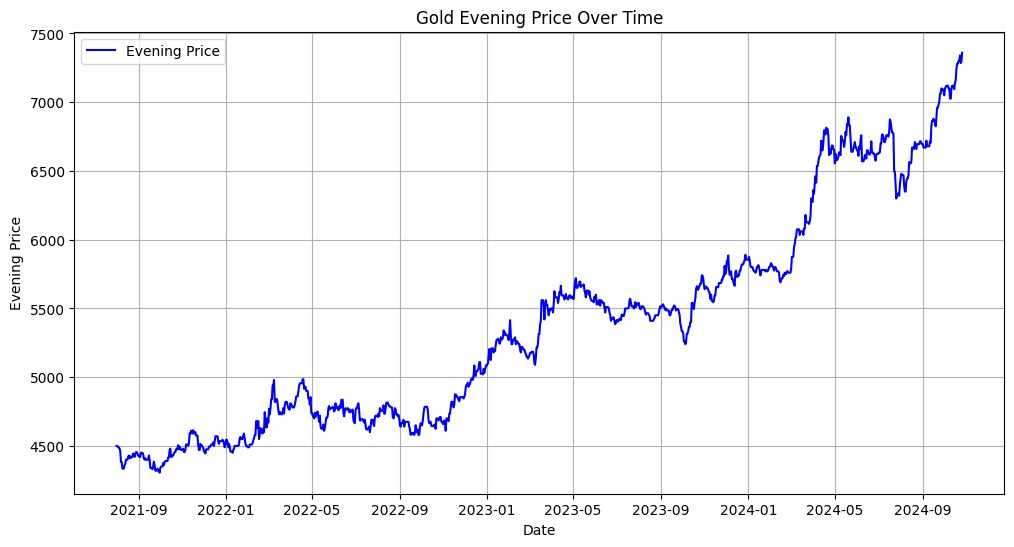

In [ ]:
# Plotting the Evening prices over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Evening'], color='blue', label='Evening Price')
plt.title('Gold Evening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Evening Price')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

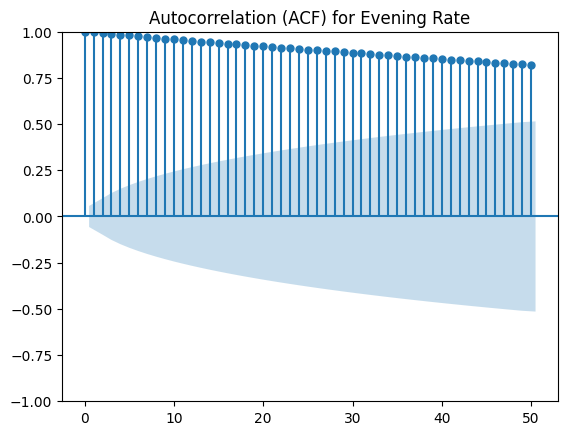

<Figure size 1200x600 with 0 Axes>

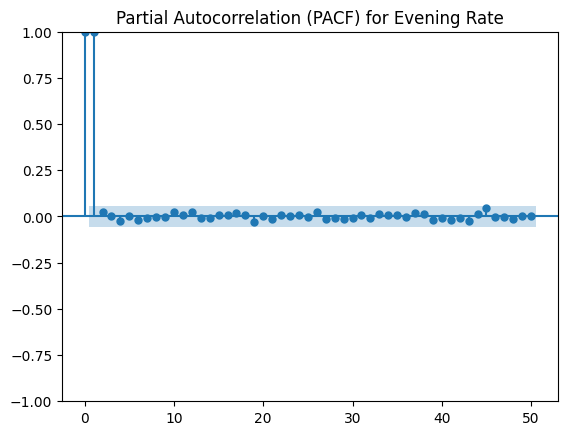

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_acf(data['Evening'], lags=50)
plt.title("Autocorrelation (ACF) for Evening Rate")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Evening'], lags=50)
plt.title("Partial Autocorrelation (PACF) for Evening Rate")
plt.show()

In [ ]:
#ADF - Adjusted Dickey-Fuller Test
#KPSS - Kwiatkowski-Phillips-Schmidt-Shin

In [ ]:
import pandas as pd
data['Evening_Differenced_1'] = [None] * len(data)
for i in range(1, len(data)):
    data.iloc[i,-1] = data.iloc[i,1] - data.iloc[i-1,1]
print(data)

            Morning  Evening  Day    Month  Year Evening_Differenced_1
Date                                                                  
2021-08-01     4500     4500    1   August  2021                  None
2021-08-02     4500     4500    2   August  2021                     0
2021-08-03     4490     4490    3   August  2021                   -10
2021-08-04     4490     4490    4   August  2021                     0
2021-08-05     4480     4480    5   August  2021                   -10
...             ...      ...  ...      ...   ...                   ...
2024-10-22     7300     7300   22  October  2024                     0
2024-10-23     7340     7340   23  October  2024                    40
2024-10-24     7285     7285   24  October  2024                   -55
2024-10-25     7295     7295   25  October  2024                    10
2024-10-26     7360     7360   26  October  2024                    65

[1183 rows x 6 columns]


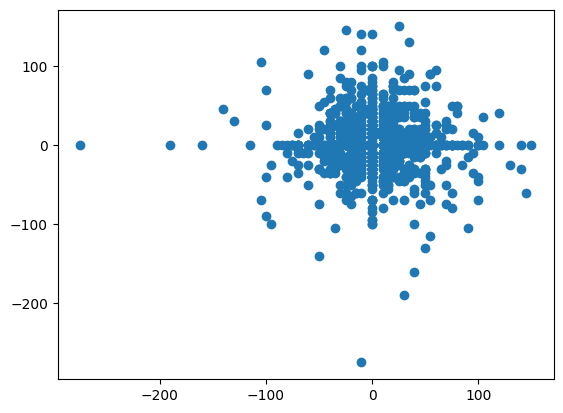

In [ ]:
plt.scatter(data.iloc[1:-1,-1],data.iloc[2:,-1]) #yt versus yt-1


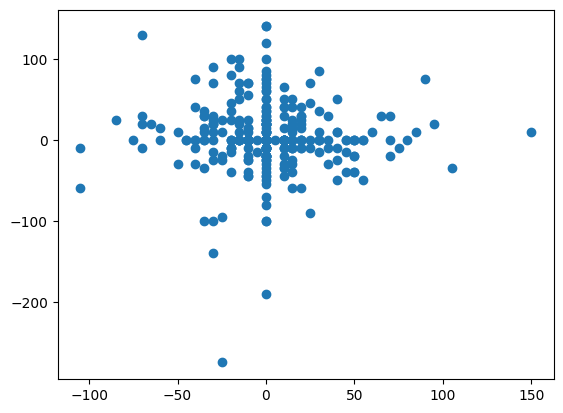

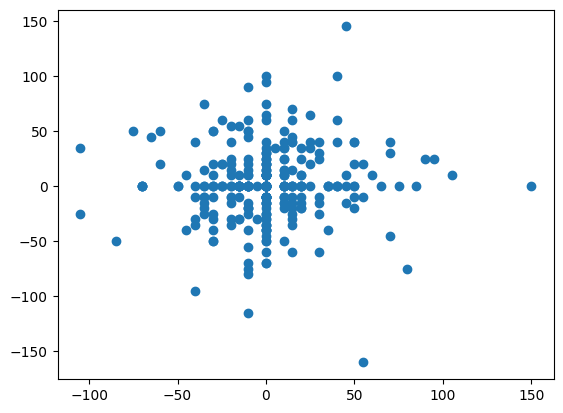

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.iloc[500:800,-1],data.iloc[500+300:800+300,-1])
plt.show()
plt.scatter(data.iloc[500:800,-1],data.iloc[500-300:800-300,-1])


In [ ]:
print(data.iloc[1:-1,-1].mean())
print(data.iloc[2:,-1].mean())
#yt vs yt-1

2.3666384419983064
2.421676545300593


Date
2021-08-13   -10.833333
2021-08-14    -8.333333
2021-08-15    -7.500000
2021-08-16    -7.500000
2021-08-17    -5.000000
                ...    
2024-10-22    22.916667
2024-10-23    20.416667
2024-10-24    13.750000
2024-10-25    14.583333
2024-10-26    20.000000
Name: Evening_Differenced_1, Length: 1171, dtype: float64 Date
2021-08-13    27.038132
2021-08-14    29.413458
2021-08-15    29.503467
2021-08-16    29.503467
2021-08-17    30.525697
                ...    
2024-10-22    31.149079
2024-10-23    28.079298
2024-10-24    35.427583
2024-10-25    35.191575
2024-10-26    37.658755
Name: Evening_Differenced_1, Length: 1171, dtype: float64


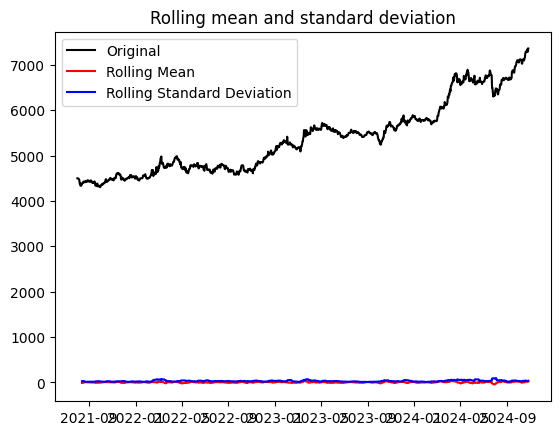

In [ ]:
rmean=data.iloc[1:,-1].rolling(window=12).mean().dropna()
rstd=data.iloc[1:,-1].rolling(window=12).std().dropna()
print(rmean,rstd)
orig=plt.plot(data['Evening'] , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

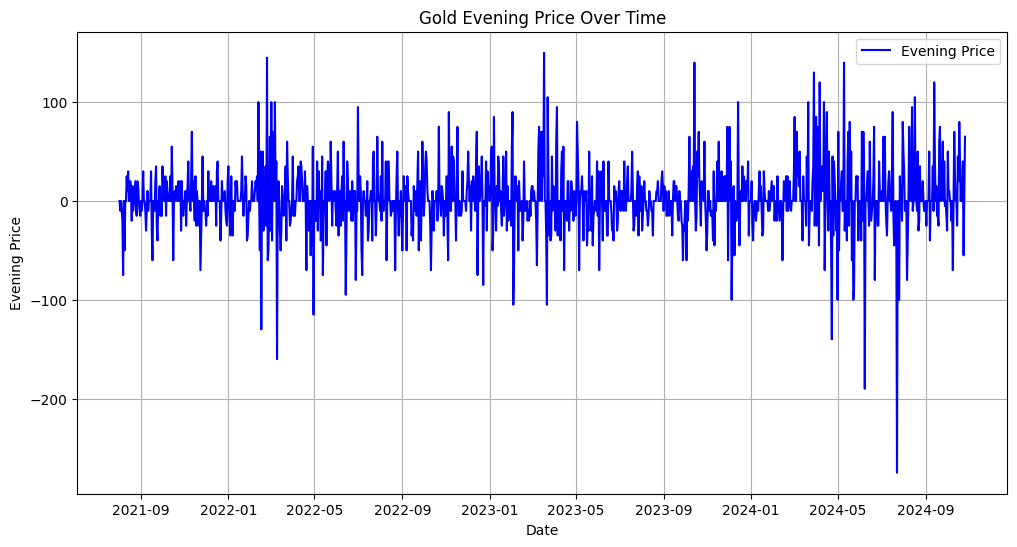

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Evening_Differenced_1'], color='blue', label='Evening Price')
plt.title('Gold Evening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Evening Price')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

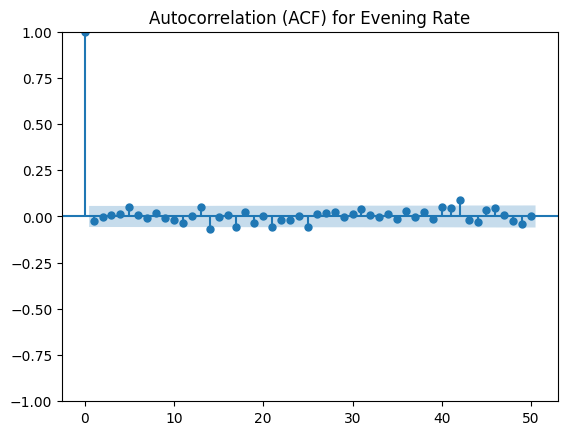

<Figure size 1200x600 with 0 Axes>

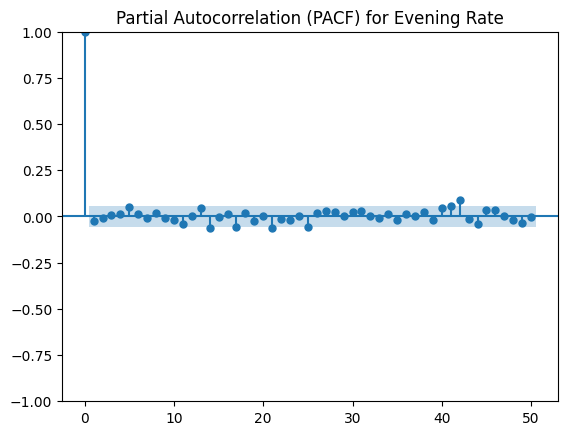

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_acf(data.iloc[1:,-1], lags=50)
plt.title("Autocorrelation (ACF) for Evening Rate")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data.iloc[1:,-1], lags=50)
plt.title("Partial Autocorrelation (PACF) for Evening Rate")
plt.show()

In [ ]:
import numpy as np
p=1
d=1
q=1
phi = [0.5] * p#phi = np.array([0.5])  # AR coefficients
theta = [0.5] * q #theta = np.array([0.4])  # MA coefficients

#predictions = [0] * d  # Start with zeros for the first d values
#errors = [0] * d
# Errors (initialize with zeros for simplicity)
predictions = np.zeros(len(data.iloc[:,-1]))
for i in range(d,d+max(p,q)):
  predictions[i] = data.iloc[:i+1,1].mean()
errors = np.zeros(len(data.iloc[:,-1]))
for i in range(d,d+max(p,q)):
  errors[i] =  data.iloc[i,1] - predictions[i]
# Model predictions
predictions = np.zeros(len(data.iloc[:,-1]))

# Compute ARIMA predictions
for t in range(d+max(p,q), len(data.iloc[:,-1])):
    # AR part: sum of lagged values multiplied by AR coefficients
    ar_term = sum(phi[i-1] * data.iloc[t - i,1] for i in range(1,p+1) ) #if t - i  >= d

    # MA part: sum of lagged error terms multiplied by MA coefficients
    ma_term = sum(theta[i-1] * errors[t - i] for i in range(1,q+1) )#if t - i  >= d

    # Prediction based on AR and MA terms
    predictions[t] = ar_term + ma_term

    # Calculate error at time t
    errors[t] = data.iloc[t,-1] - predictions[t]
print(predictions)
print(errors)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Extract the variables
yt = data.iloc[2:, -1].values.reshape(-1, 1)  # Dependent variable
yt_minus_1 = data.iloc[1:-1, -1].values.reshape(-1, 1)  # Independent variable

# Initialize and fit the model
model = LinearRegression()
model.fit(yt_minus_1, yt)

# Get the parameters
beta_0 = model.intercept_[0]  # Intercept
beta_1 = model.coef_[0][0]    # Slope
print(f"Intercept (β₀): {beta_0}")
print(f"Slope (β₁): {beta_1}")
data['Evening_Differenced_1_predicted'] = [0]*len(data.iloc[:,:])#7
data['Evening_Differenced_1_error'] = [0]*len(data.iloc[:,:])#8
for i in range(2,len(data.iloc[:,:])):
  data.iloc[i,6] = beta_0 +  beta_1 * data.iloc[i-1,5]
  data.iloc[i,7] =  data.iloc[i,5] - data.iloc[i,6]
print(data)

Intercept (β₀): 2.48386881352353
Slope (β₁): -0.026278736590801106


<ipython-input-19-cbcb80e93507>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.48386881352353' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[i,6] = beta_0 +  beta_1 * data.iloc[i-1,5]
<ipython-input-19-cbcb80e93507>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-12.48386881352353' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[i,7] =  data.iloc[i,5] - data.iloc[i,6]


            Morning  Evening  Day    Month  Year Evening_Differenced_1  \
Date                                                                     
2021-08-01     4500     4500    1   August  2021                  None   
2021-08-02     4500     4500    2   August  2021                     0   
2021-08-03     4490     4490    3   August  2021                   -10   
2021-08-04     4490     4490    4   August  2021                     0   
2021-08-05     4480     4480    5   August  2021                   -10   
...             ...      ...  ...      ...   ...                   ...   
2024-10-22     7300     7300   22  October  2024                     0   
2024-10-23     7340     7340   23  October  2024                    40   
2024-10-24     7285     7285   24  October  2024                   -55   
2024-10-25     7295     7295   25  October  2024                    10   
2024-10-26     7360     7360   26  October  2024                    65   

            Evening_Differenced_1_pre

In [ ]:
yt = data.iloc[3:-4, 5].values.reshape(-1, 1)  # Dependent variable
et_minus_1 = data.iloc[2:-5, -1].values.reshape(-1, 1)  # Independent variable
# Initialize and fit the model

model = LinearRegression()
model.fit(et_minus_1, yt)

e_beta_0 = model.intercept_[0]  # Intercept
e_beta_1 = model.coef_[0][0]    # Slope
print(e_beta_0)
print(e_beta_1)
sum =0
data['final_error'] = [0]*len(data.iloc[:,:])
for i in range(3,len(data.iloc[:,:])):
  data.iloc[i,6] += data.iloc[i,7]+e_beta_0 -  e_beta_1 * data.iloc[i-1,7]
  data.iloc[i,-1] =  data.iloc[i,5] - data.iloc[i,6]
  sum += (data.iloc[i,-1])**2
print(data)
print(sum)
'''
print(len(yt))
print(len(et_minus_1))
'''

2.388440226298877
-0.024894172605260095


<ipython-input-20-2a6a2808bfc5>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.077664641273599' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[i,-1] =  data.iloc[i,5] - data.iloc[i,6]


            Morning  Evening  Day    Month  Year Evening_Differenced_1  \
Date                                                                     
2021-08-01     4500     4500    1   August  2021                  None   
2021-08-02     4500     4500    2   August  2021                     0   
2021-08-03     4490     4490    3   August  2021                   -10   
2021-08-04     4490     4490    4   August  2021                     0   
2021-08-05     4480     4480    5   August  2021                   -10   
...             ...      ...  ...      ...   ...                   ...   
2024-10-22     7300     7300   22  October  2024                     0   
2024-10-23     7340     7340   23  October  2024                    40   
2024-10-24     7285     7285   24  October  2024                   -55   
2024-10-25     7295     7295   25  October  2024                    10   
2024-10-26     7360     7360   26  October  2024                    65   

            Evening_Differenced_1_pre

'\nprint(len(yt))\nprint(len(et_minus_1))\n'

In [ ]:
train_data = data.iloc[:1096,:]
test_data = data.iloc[1096:,:]
print(train_data)
print(test_data)

            Morning  Evening  Day   Month  Year Evening_Differenced_1
Date                                                                 
2021-08-01     4500     4500    1  August  2021                  None
2021-08-02     4500     4500    2  August  2021                     0
2021-08-03     4490     4490    3  August  2021                   -10
2021-08-04     4490     4490    4  August  2021                     0
2021-08-05     4480     4480    5  August  2021                   -10
...             ...      ...  ...     ...   ...                   ...
2024-07-27     6325     6325   27    July  2024                    25
2024-07-28     6325     6325   28    July  2024                     0
2024-07-29     6340     6340   29    July  2024                    15
2024-07-30     6320     6320   30    July  2024                   -20
2024-07-31     6400     6400   31    July  2024                    80

[1096 rows x 6 columns]
            Morning  Evening  Day    Month  Year Evening_Differen

Mean Absolute Error (MAE): 24.630105620732294
Mean Squared Error (MSE): 1322.547512513971
Root Mean Squared Error (RMSE): 36.36684633720624
R-squared (R2 Score): -0.07326708718969122


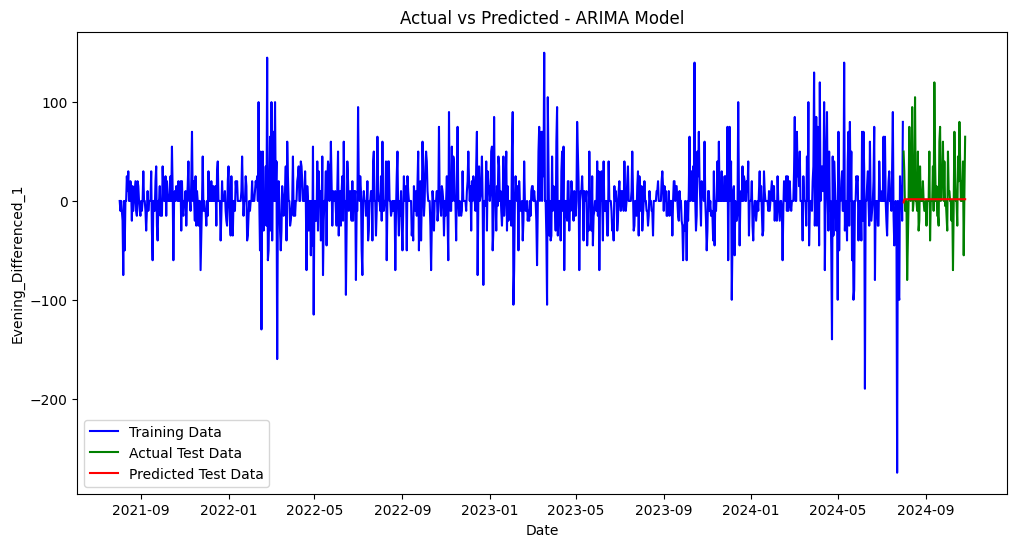

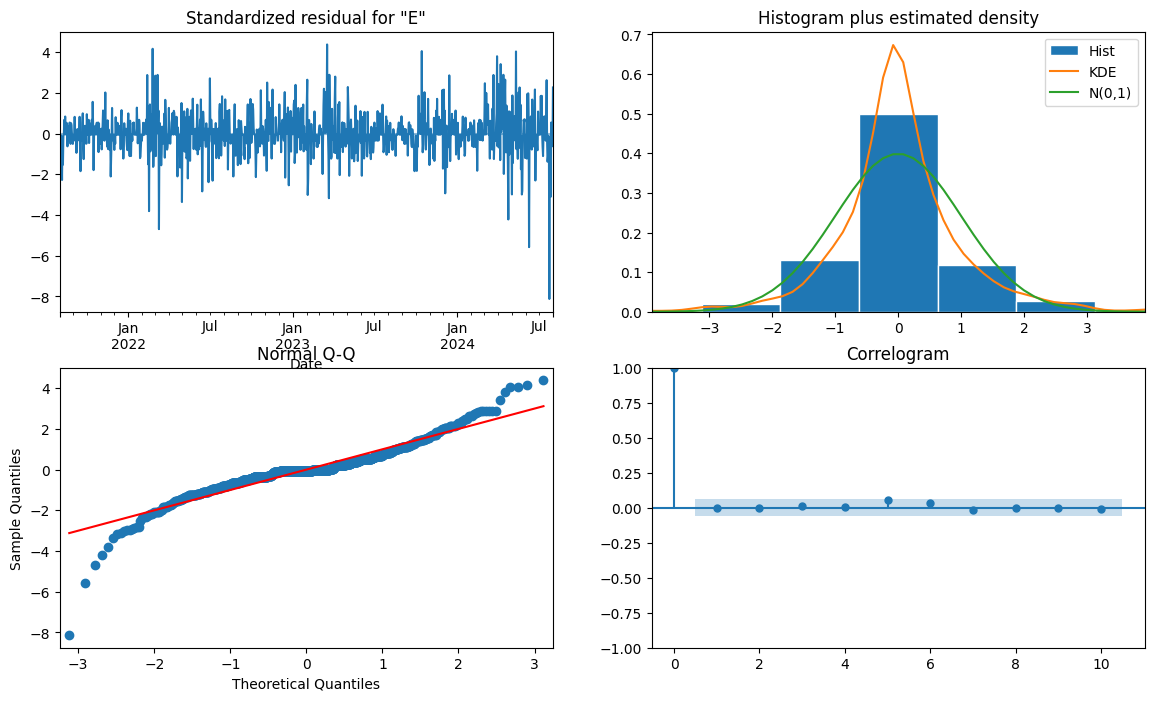

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming train_data and test_data are already defined
# Specify the target column for ARIMA modeling
train_series = pd.to_numeric(train_data['Evening_Differenced_1'], errors='coerce').dropna()
test_series = pd.to_numeric(test_data['Evening_Differenced_1'], errors='coerce').dropna()
#train_series = pd.to_numeric(train_data['Evening'], errors='coerce').dropna()
#test_series = pd.to_numeric(test_data['Evening'], errors='coerce').dropna()

train_series.index.freq = pd.infer_freq(train_series.index)
test_series.index.freq = pd.infer_freq(test_series.index)

# Step 1: Build and Train the ARIMA Model
# Use the order (p, d, q) based on prior analysis, e.g., (1,1,1) as an example
model = ARIMA(train_series, order=(1,0,1))
arima_result = model.fit()

# Step 2: Forecast for Test Set
forecast = arima_result.forecast(steps=len(test_series))

# Step 3: Evaluate Model Performance
mae = mean_absolute_error(test_series, forecast)
mse = mean_squared_error(test_series, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test_series, forecast)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2 Score):", r2)

# Step 4: Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(train_series.index, train_series, label="Training Data", color='blue')
plt.plot(test_series.index, test_series, label="Actual Test Data", color='green')
plt.plot(test_series.index, forecast, label="Predicted Test Data", color='red')
plt.title("Actual vs Predicted - ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Evening_Differenced_1")
plt.legend()
plt.show()

# Step 5: Diagnostic Plots
# These are essential for checking residuals of the fitted ARIMA model
arima_result.plot_diagnostics(figsize=(14, 8))
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming train_data and test_data are already defined
# Convert target column to numeric and handle missing values
train_series = pd.to_numeric(train_data['Evening_Differenced_1'], errors='coerce').dropna()
test_series = pd.to_numeric(test_data['Evening_Differenced_1'], errors='coerce').dropna()

train_series.index.freq = pd.infer_freq(train_series.index)
test_series.index.freq = pd.infer_freq(test_series.index)

# Step 1: Build and Train the SARIMA Model
# Define SARIMA model order; example: (1,0,1) with seasonal order (1,0,1,365)
model = SARIMAX(train_series, order=(1, 0, 1), seasonal_order=(1, 0, 1, 365))
sarima_result = model.fit(method='bfgs', maxiter=1, disp=2)

# Step 2: Forecast for the Test Set
forecast = sarima_result.forecast(steps=len(test_series))

# Step 3: Evaluate Model Performance
mae = mean_absolute_error(test_series, forecast)
mse = mean_squared_error(test_series, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test_series, forecast)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2 Score):", r2)

# Step 4: Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(train_series.index, train_series, label="Training Data", color='blue')
plt.plot(test_series.index, test_series, label="Actual Test Data", color='green')
plt.plot(test_series.index, forecast, label="Predicted Test Data", color='red')
plt.title("Actual vs Predicted - SARIMA Model")
plt.xlabel("Date")
plt.ylabel("Evening_Differenced_1")
plt.legend()
plt.show()

# Step 5: Diagnostic Plots
sarima_result.plot_diagnostics(figsize=(14, 8))
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 4.950158
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2


In [ ]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.3 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

# Automatically find the optimal SARIMA parameters
model = pm.auto_arima(
    data.iloc[1:,-1],
    seasonal=True, m=365,  # Set m based on your seasonal period
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    start_P=0, max_P=3,
    start_Q=0, max_Q=3,
    d=0,  # Set d if data is already differenced
    D=1,  # Start with D=1 if seasonality is present
    trace=True,  # Shows detailed search results
    error_action='ignore', suppress_warnings=True
)

# Print the best parameters
print(model.summary())


Performing stepwise search to minimize aic


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np



In [ ]:
from xgboost import XGBRegressor

# Step 1: Create Lag Features in Training Data
#train_data['Morning_lag1'] = train_data['Morning'].shift(1)
#train_data['Evening_lag1'] = train_data['Evening'].shift(1)
#train_data = train_data.dropna()  # Drop rows with NaN values after shifting

# Step 2: Define Training Features and Target
X_train = train_data[['Day','Month','Year']]
y_train = train_data['Evening']

# Step 3: Create Lag Features in Test Data
#test_data['Morning_lag1'] = test_data['Morning'].shift(1)
#test_data['Evening_lag1'] = test_data['Evening'].shift(1)
#test_data = test_data.dropna()  # Drop rows with NaN values after shifting

# Step 4: Define Testing Features and Target
X_test = test_data[['Day','Month','Year']]
y_test = test_data['Evening']

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost MAE:", xgb_mae)
print("XGBoost RMSE:", xgb_rmse)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print("KNN MAE:", knn_mae)
print("KNN RMSE:", knn_rmse)


test_data['Month'] = pd.to_datetime(test_data['Month'], format='%B').dt.month
test_data['Month'] = pd.to_datetime(test_data['Month'], format='%B').dt.month

XGBoost MAE: 108.60252222521552
XGBoost RMSE: 171.90705348287494
KNN MAE: 117.28735632183908
KNN RMSE: 188.35329972485584


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
from tabulate import tabulate




+----------+---------+----------+
|          |  RMSE   | R2_Score |
+----------+---------+----------+
| PureGold | 1.3e+03 |   0.98   |
+----------+---------+----------+


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
import pandas as pd

# Assuming 'df' is your original DataFrame with necessary columns
df_no_day = df.copy()

# Ensure 'Date' column is in datetime format
df_no_day['Date'] = pd.to_datetime(df_no_day['Date'], errors='coerce')

# Extract day, month, and year from 'Date' column
df_no_day['Day'] = df_no_day['Date'].dt.day
df_no_day['Month'] = df_no_day['Date'].dt.month
df_no_day['Year'] = df_no_day['Date'].dt.year

# Create lagged features for 'Evening' column
df_no_day['Evening_lag_1'] = df_no_day['Evening'].shift(1)
df_no_day['Evening_lag_2'] = df_no_day['Evening'].shift(2)
df_no_day['Evening_lag_3'] = df_no_day['Evening'].shift(3)

# Create moving average features for 'Evening'
df_no_day['MA_5'] = df_no_day['Evening'].rolling(window=5).mean()
df_no_day['MA_10'] = df_no_day['Evening'].rolling(window=10).mean()
df_no_day['MA_20'] = df_no_day['Evening'].rolling(window=20).mean()

# Drop original 'Date' column if not needed
df_no_day.drop(columns=['Date'], inplace=True)

# Drop rows with NaN values generated by rolling and lagging operations
df_no_day.dropna(inplace=True)

# Define relevant features including Day, Month, Year
relevant_features = [
    'Day',
    'Month',
    'Year',
    'Evening_lag_1', 'Evening_lag_2', 'Evening_lag_3',
    'MA_5', 'MA_10', 'MA_20'
]

# Select only the relevant features and target
X = df_no_day[relevant_features]
y = df_no_day['Evening']

# Split into training and test sets
test_size = 90  # Define the test size as the last 90 rows

# Use the last 90 rows as the test set and the remaining as the training set
X_train = X.iloc[:-test_size]
y_train = y.iloc[:-test_size]
X_test = X.iloc[-test_size:]
y_test = y.iloc[-test_size:]

# Print shapes to verify
print("\n----- After Processing -----\n")
print('Shape of features (training set):', X_train.shape)
print('Shape of target (training set):', y_train.shape)
print('Shape of features (test set):', X_test.shape)
print('Shape of target (test set):', y_test.shape)




----- After Processing -----

Shape of features (training set): (1074, 9)
Shape of target (training set): (1074,)
Shape of features (test set): (90, 9)
Shape of target (test set): (90,)


<ipython-input-138-5724c91f39f4>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_no_day['Date'] = pd.to_datetime(df_no_day['Date'], errors='coerce')


In [ ]:
print(df_no_day.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1164 entries, 19 to 1182
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Morning        1164 non-null   int64  
 1   Evening        1164 non-null   int64  
 2   Day            1164 non-null   int32  
 3   Month          1164 non-null   int32  
 4   Year           1164 non-null   int32  
 5   Evening_lag_1  1164 non-null   float64
 6   Evening_lag_2  1164 non-null   float64
 7   Evening_lag_3  1164 non-null   float64
 8   MA_5           1164 non-null   float64
 9   MA_10          1164 non-null   float64
 10  MA_20          1164 non-null   float64
dtypes: float64(6), int32(3), int64(2)
memory usage: 95.5 KB
None


In [ ]:
'''# Drop rows with NaN values generated by lagged and rolling features
df_no_day = df_no_day.dropna()

# Split the data into train and test sets
train_data = df_no_day.iloc[:1096, :]  # Adjust the index to your desired split
test_data = df_no_day.iloc[1096:, :]

# Define features and target
feature_cols = ['Evening_lag_1', 'Evening_lag_2', 'Evening_lag_3', 'MA_5', 'MA_10','MA_20']
X_train = train_data[feature_cols].values
y_train = train_data['Evening'].values
X_test = test_data[feature_cols].values
y_test = test_data['Evening'].values'''

In [ ]:
# 1. Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5,random_state=0)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      random_state=0)

In [ ]:
y_pred_dt = dt_model.predict(X_test)

#Mean Squared error
mse = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 76260.65


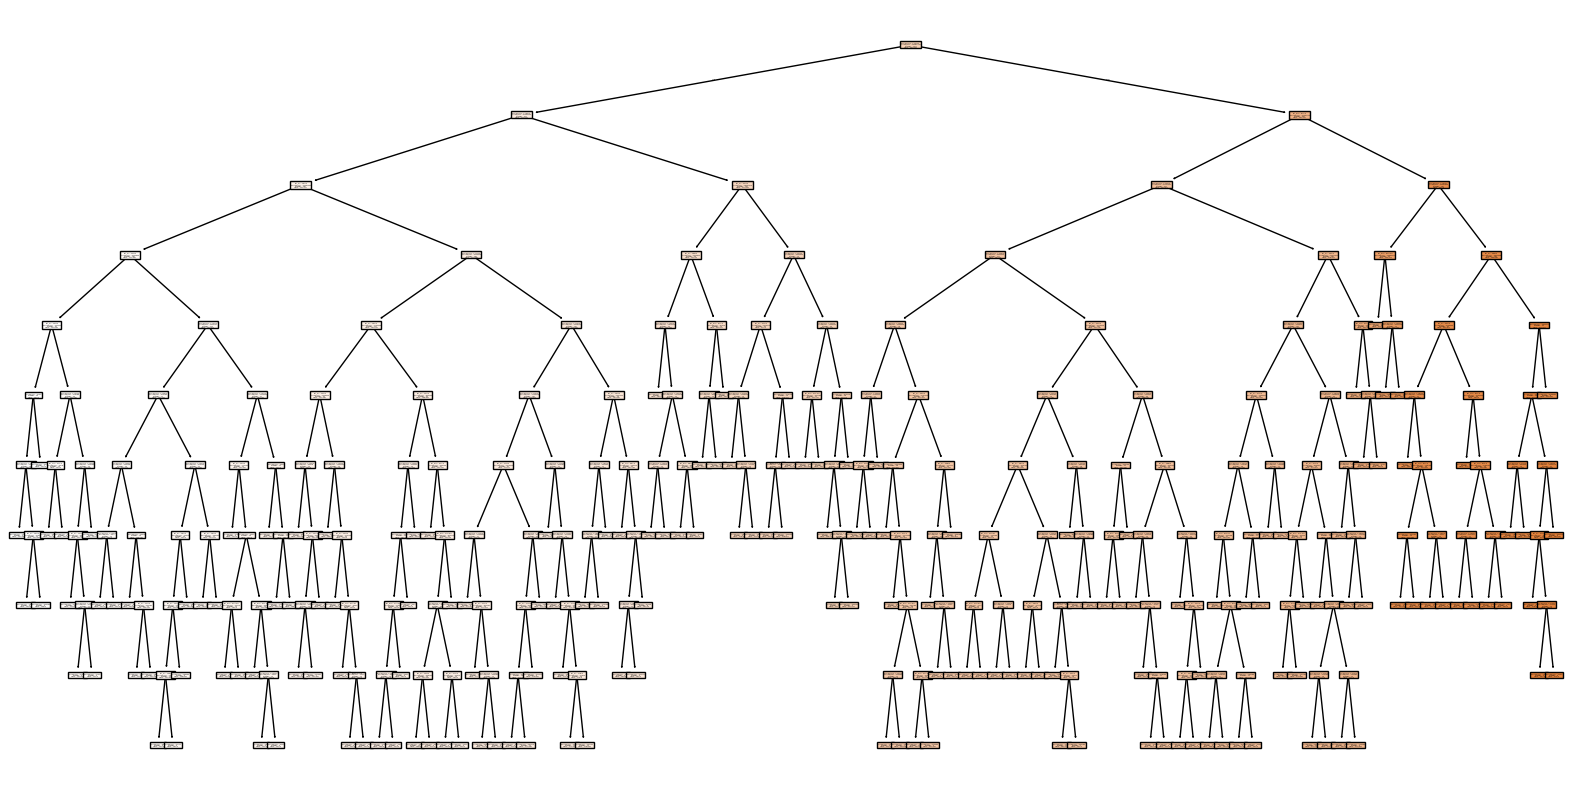

'decision_tree.pdf'

In [ ]:
'''# Plot the decision tree for visualization
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import graphviz

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=[
    'Day',
    'Month',
    'Year',
    'Evening_lag_1', 'Evening_lag_2', 'Evening_lag_3',
    'MA_5', 'MA_10', 'MA_20'
], filled=True)
plt.show()
dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=['Day', 'Month', 'Year',
                                          'Evening_lag_1', 'Evening_lag_2',
                                          'Evening_lag_3', 'MA_5', 'MA_10',
                                          'MA_20'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save the tree visualization as a file'''

<ipython-input-142-dd0c78fbc99c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Date'] = pd.to_datetime(X_train[['Year', 'Month', 'Day']])
<ipython-input-142-dd0c78fbc99c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Date'] = pd.to_datetime(X_test[['Year', 'Month', 'Day']])


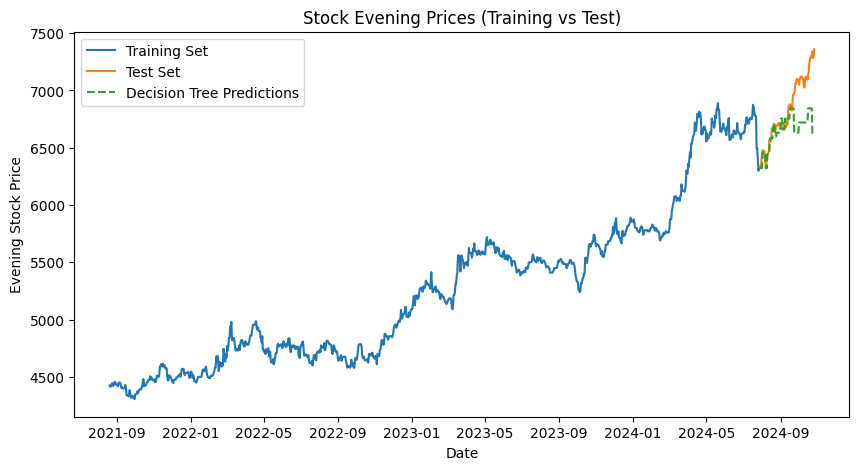

In [ ]:
# Create a Date column for the training set
X_train['Date'] = pd.to_datetime(X_train[['Year', 'Month', 'Day']])

# Create a Date column for the test set
X_test['Date'] = pd.to_datetime(X_test[['Year', 'Month', 'Day']])

# Plotting training and test set
plt.figure(figsize=(10, 5))
plt.plot(X_train['Date'], y_train, label='Training Set')  # Use 'Date' from X_train for training values
plt.plot(X_test['Date'], y_test, label='Test Set')  # Use 'Date' from X_test for test values
plt.plot(X_test['Date'], y_pred_dt, label='Decision Tree Predictions', linestyle='--')  # Predictions
plt.xlabel('Date')  # X-axis label
plt.ylabel('Evening Stock Price')  # Y-axis label
plt.title('Stock Evening Prices (Training vs Test)')  # Title
plt.legend()  # Show legend
plt.show()  # Display the plot

In [ ]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1074 entries, 19 to 1092
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Day            1074 non-null   int32         
 1   Month          1074 non-null   int32         
 2   Year           1074 non-null   int32         
 3   Evening_lag_1  1074 non-null   float64       
 4   Evening_lag_2  1074 non-null   float64       
 5   Evening_lag_3  1074 non-null   float64       
 6   MA_5           1074 non-null   float64       
 7   MA_10          1074 non-null   float64       
 8   MA_20          1074 non-null   float64       
 9   Date           1074 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int32(3)
memory usage: 79.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 1093 to 1182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   

In [ ]:
# Drop the Date column if it exists
X_train.drop(columns=['Date'], inplace=True)
X_test.drop(columns=['Date'], inplace=True)


<ipython-input-147-85d9485d20f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['Date'], inplace=True)
<ipython-input-147-85d9485d20f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['Date'], inplace=True)


In [ ]:
# 2. Random Forest Model
rf_model = RandomForestRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5,n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      random_state=0)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

#Mean Squared error
mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 48450.04


<ipython-input-150-77091562086b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Date'] = pd.to_datetime(X_train[['Year', 'Month', 'Day']])
<ipython-input-150-77091562086b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Date'] = pd.to_datetime(X_test[['Year', 'Month', 'Day']])


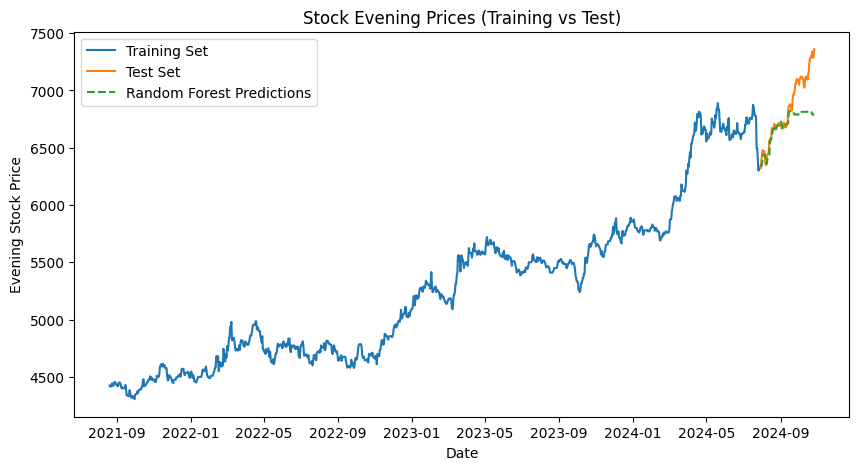

In [ ]:
# Create a Date column for the training set
X_train['Date'] = pd.to_datetime(X_train[['Year', 'Month', 'Day']])

# Create a Date column for the test set
X_test['Date'] = pd.to_datetime(X_test[['Year', 'Month', 'Day']])

# Plotting training and test set
plt.figure(figsize=(10, 5))
plt.plot(X_train['Date'], y_train, label='Training Set')  # Use 'Date' from X_train for training values
plt.plot(X_test['Date'], y_test, label='Test Set')  # Use 'Date' from X_test for test values
plt.plot(X_test['Date'], y_pred_rf, label='Random Forest Predictions', linestyle='--')  # Predictions
plt.xlabel('Date')  # X-axis label
plt.ylabel('Evening Stock Price')  # Y-axis label
plt.title('Stock Evening Prices (Training vs Test)')  # Title
plt.legend()  # Show legend
plt.show()  # Display the plot

In [ ]:
# Drop the Date column if it exists
X_train.drop(columns=['Date'], inplace=True)
X_test.drop(columns=['Date'], inplace=True)

<ipython-input-151-85d9485d20f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['Date'], inplace=True)
<ipython-input-151-85d9485d20f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['Date'], inplace=True)


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Initialize and train the GBRT model
gbrt_model = HistGradientBoostingRegressor(max_iter=100, random_state=0)
gbrt_model.fit(X_train, y_train)


HistGradientBoostingRegressor(random_state=0)

In [ ]:
# Make predictions
y_pred_gbrt = gbrt_model.predict(X_test)

#Mean Squared error
mse = mean_squared_error(y_test, y_pred_gbrt)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 64290.58


<ipython-input-157-ac826c815ebe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Date'] = pd.to_datetime(X_train[['Year', 'Month', 'Day']])
<ipython-input-157-ac826c815ebe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Date'] = pd.to_datetime(X_test[['Year', 'Month', 'Day']])


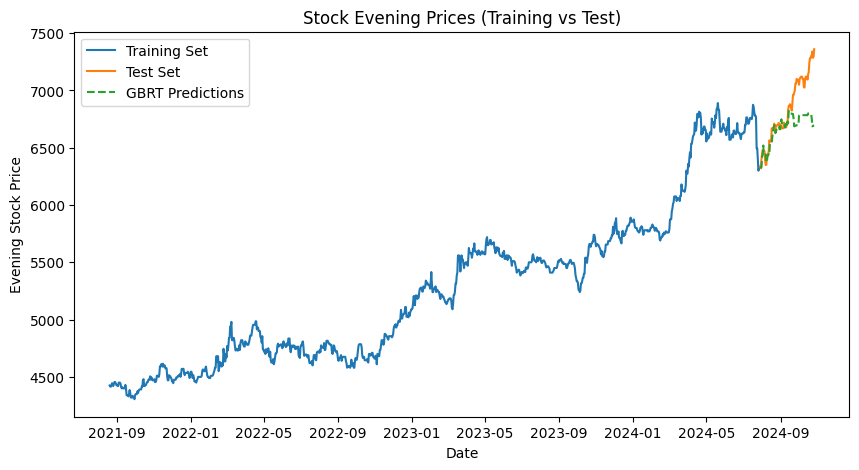

In [ ]:
# Create a Date column for the training set
X_train['Date'] = pd.to_datetime(X_train[['Year', 'Month', 'Day']])

# Create a Date column for the test set
X_test['Date'] = pd.to_datetime(X_test[['Year', 'Month', 'Day']])

# Plotting training and test set
plt.figure(figsize=(10, 5))
plt.plot(X_train['Date'], y_train, label='Training Set')  # Use 'Date' from X_train for training values
plt.plot(X_test['Date'], y_test, label='Test Set')  # Use 'Date' from X_test for test values
plt.plot(X_test['Date'], y_pred_gbrt, label='GBRT Predictions', linestyle='--')  # Predictions
plt.xlabel('Date')  # X-axis label
plt.ylabel('Evening Stock Price')  # Y-axis label
plt.title('Stock Evening Prices (Training vs Test)')  # Title
plt.legend()  # Show legend
plt.show()  # Display the plot